In [1]:
# Upload your kaggle.json file using this cell so that you can use the kaggle API
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ifeanyinneji","key":"68b7b1b6c0d102f7d9941d0b3eff800a"}'}

In [2]:
# This cell creates a .kaggle hidden folder in our root directory and copies the kaggle.json file to the folder.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [3]:
# This cell will download the dataset used for this project to the /content directory and also unzip the csv file.
!kaggle datasets download -d CooperUnion/anime-recommendations-database
!unzip /content/anime-recommendations-database.zip

 36% 9.00M/25.0M [00:00<00:00, 79.7MB/s]
100% 25.0M/25.0M [00:00<00:00, 160MB/s] 
Archive:  /content/anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [5]:
df_anime = pd.read_csv('anime.csv')
df_rating = pd.read_csv('rating.csv')
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [8]:
print("Anime data shape: ", df_anime.shape)
print("Ratings data shape: ", df_rating.shape)

Anime data shape:  (12294, 7)
Ratings data shape:  (7813737, 3)


In [12]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [19]:
total_genres = []
for g in df_anime["genre"]:
    g = g
    if g not in total_genres:
        total_genres.append(g)
total_genres

['Drama, Romance, School, Supernatural',
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'Sci-Fi, Thriller',
 'Comedy, Drama, School, Shounen, Sports',
 'Action, Adventure, Shounen, Super Power',
 'Drama, Military, Sci-Fi, Space',
 'Drama, Fantasy, Romance, Slice of Life, Supernatural',
 'Drama, School, Shounen',
 'Action, Drama, Mecha, Military, Sci-Fi, Super Power',
 'Adventure, Drama, Supernatural',
 'Drama, Music, Romance, School, Shounen',
 'Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural',
 'Fantasy, Slice of Life',
 'Action, Mecha, Military, School, Sci-Fi, Super Power',
 'Comedy, Drama, Shounen, Sports',
 'Action, Drama, Historical, Martial Arts, Romance, Samurai',
 'Action, Adventure, Comedy, Drama, Sci-Fi, Space',
 'Action, Comedy, Parody, Sci-Fi, Seinen, Super Power, Supernatural',
 'Action, Adventure, Fantasy',
 'Comedy, Mystery, Romance, School, Sci-Fi, Supernatur

In [ ]:
year, title = [], []
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [20]:
final_df = pd.merge(df_rating, df_anime, how='left',on='anime_id')
final_df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297.0
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553.0
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772.0
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511.0
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395.0


In [21]:
title_rating = final_df.groupby(['name'])[['rating_y']].sum()
title_rating = title_rating.nlargest(10,'rating_y')
title_rating.head()

,rating_y
name,
Death Note,342651.40
Shingeki no Kyojin,252647.36
Code Geass: Hangyaku no Lelouch,244749.94
Sword Art Online,239464.89
Angel Beats!,228065.37


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


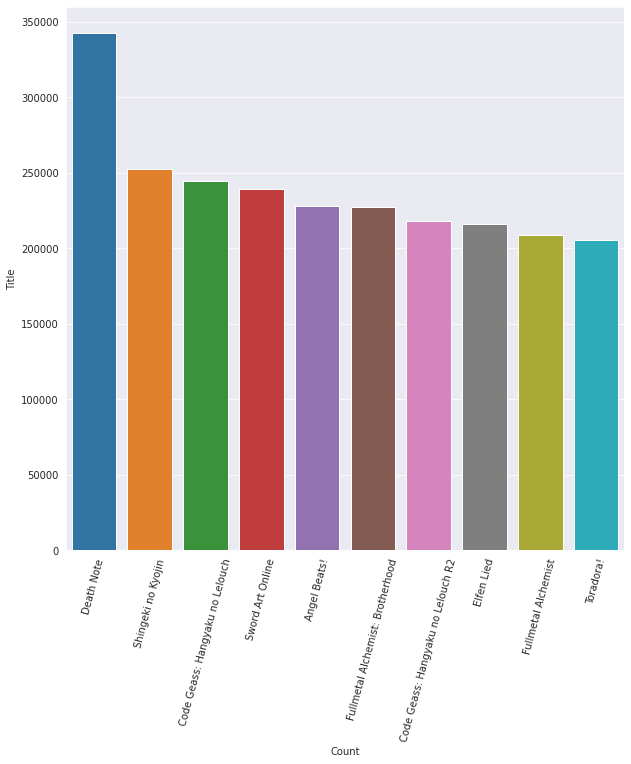

In [22]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_rating.index, title_rating['rating_y']);
plt.ylabel('Title');
plt.xlabel('Count');

In [24]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_anime['genre'].values.astype('U'))

In [25]:
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
indices=pd.Series(df_anime.index,index=df_anime['name'])
titles=df_anime['name']
def recom_sys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:11]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [27]:
recom_sys('Death Note')

778                           Death Note Rewrite
981                              Mousou Dairinin
144                Higurashi no Naku Koro ni Kai
1383               Higurashi no Naku Koro ni Rei
445                             Mirai Nikki (TV)
4164           Mirai Nikki (TV): Ura Mirai Nikki
334                    Higurashi no Naku Koro ni
38                                       Monster
5382                                   AD Police
2074    Higurashi no Naku Koro ni Kaku: Outbreak
Name: name, dtype: object